## Library

In [1]:
!pip install sktime -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.7/145.7 kB 13.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.datasets import load_basic_motions

In [3]:
!pip freeze

absl-py==1.4.0
accelerate==1.9.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.10.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.7.2
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.8.4.0.42.59
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.13.0
bigquery-magics==0.10.2
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.6.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.8.3
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.90
clarabel==0.11.1
click==8.2.1
cloudpathlib==0.21.1
cloudpickle==3

# Data

In [ ]:
# Load the basic motions dataset
X_train, y_train = load_basic_motions(split="train", return_X_y=True, return_type = 'numpy3D')
X_test, y_test = load_basic_motions(split="test", return_X_y=True, return_type = 'numpy3D')

In [ ]:
# Check the shape of the data
X_train.shape

(40, 6, 100)

In [ ]:
# Sample the accelerometer
X_train[0][0]

array([ 0.079106,  0.079106, -0.903497,  1.116125,  1.6382  ,  1.003448,
        0.028774,  0.03005 , -0.120485, -0.120485,  0.667496, -0.312815,
       -0.032064,  0.462654,  0.462654,  0.50726 ,  0.381774, -0.173109,
        0.075566,  0.182602,  0.241339,  0.128828, -0.005551, -0.234381,
       -0.060061,  0.134305, -0.119217, -0.118415, -0.034857, -0.152736,
       -0.30275 , -0.258284, -0.153046, -0.183976, -0.160971, -0.241554,
       -0.12605 , -0.047558, -0.180656, -0.223321, -0.269544, -0.132218,
       -0.247598, -0.167151, -0.226787, -0.226787, -0.221194, -0.124525,
       -0.215384, -0.292342, -0.2096  , -0.350283, -0.212305, -0.101916,
       -0.125474, -0.171308, -0.392737, -0.333702, -0.049047, -0.161384,
       -0.332913, -0.323573, -0.260746, -0.386039,  0.073956,  0.013228,
       -0.134901, -0.114447, -0.151736, -0.265312, -0.265312, -0.192506,
        0.006082,  0.006082, -0.056635, -0.209398, -0.160216, -0.135851,
       -0.27988 , -0.181434, -0.129874, -0.041725, 

In [ ]:
# Investigate the y_train
y_train

array(['standing', 'standing', 'standing', 'standing', 'standing',
       'standing', 'standing', 'standing', 'standing', 'standing',
       'running', 'running', 'running', 'running', 'running', 'running',
       'running', 'running', 'running', 'running', 'walking', 'walking',
       'walking', 'walking', 'walking', 'walking', 'walking', 'walking',
       'walking', 'walking', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton'], dtype='<U9')

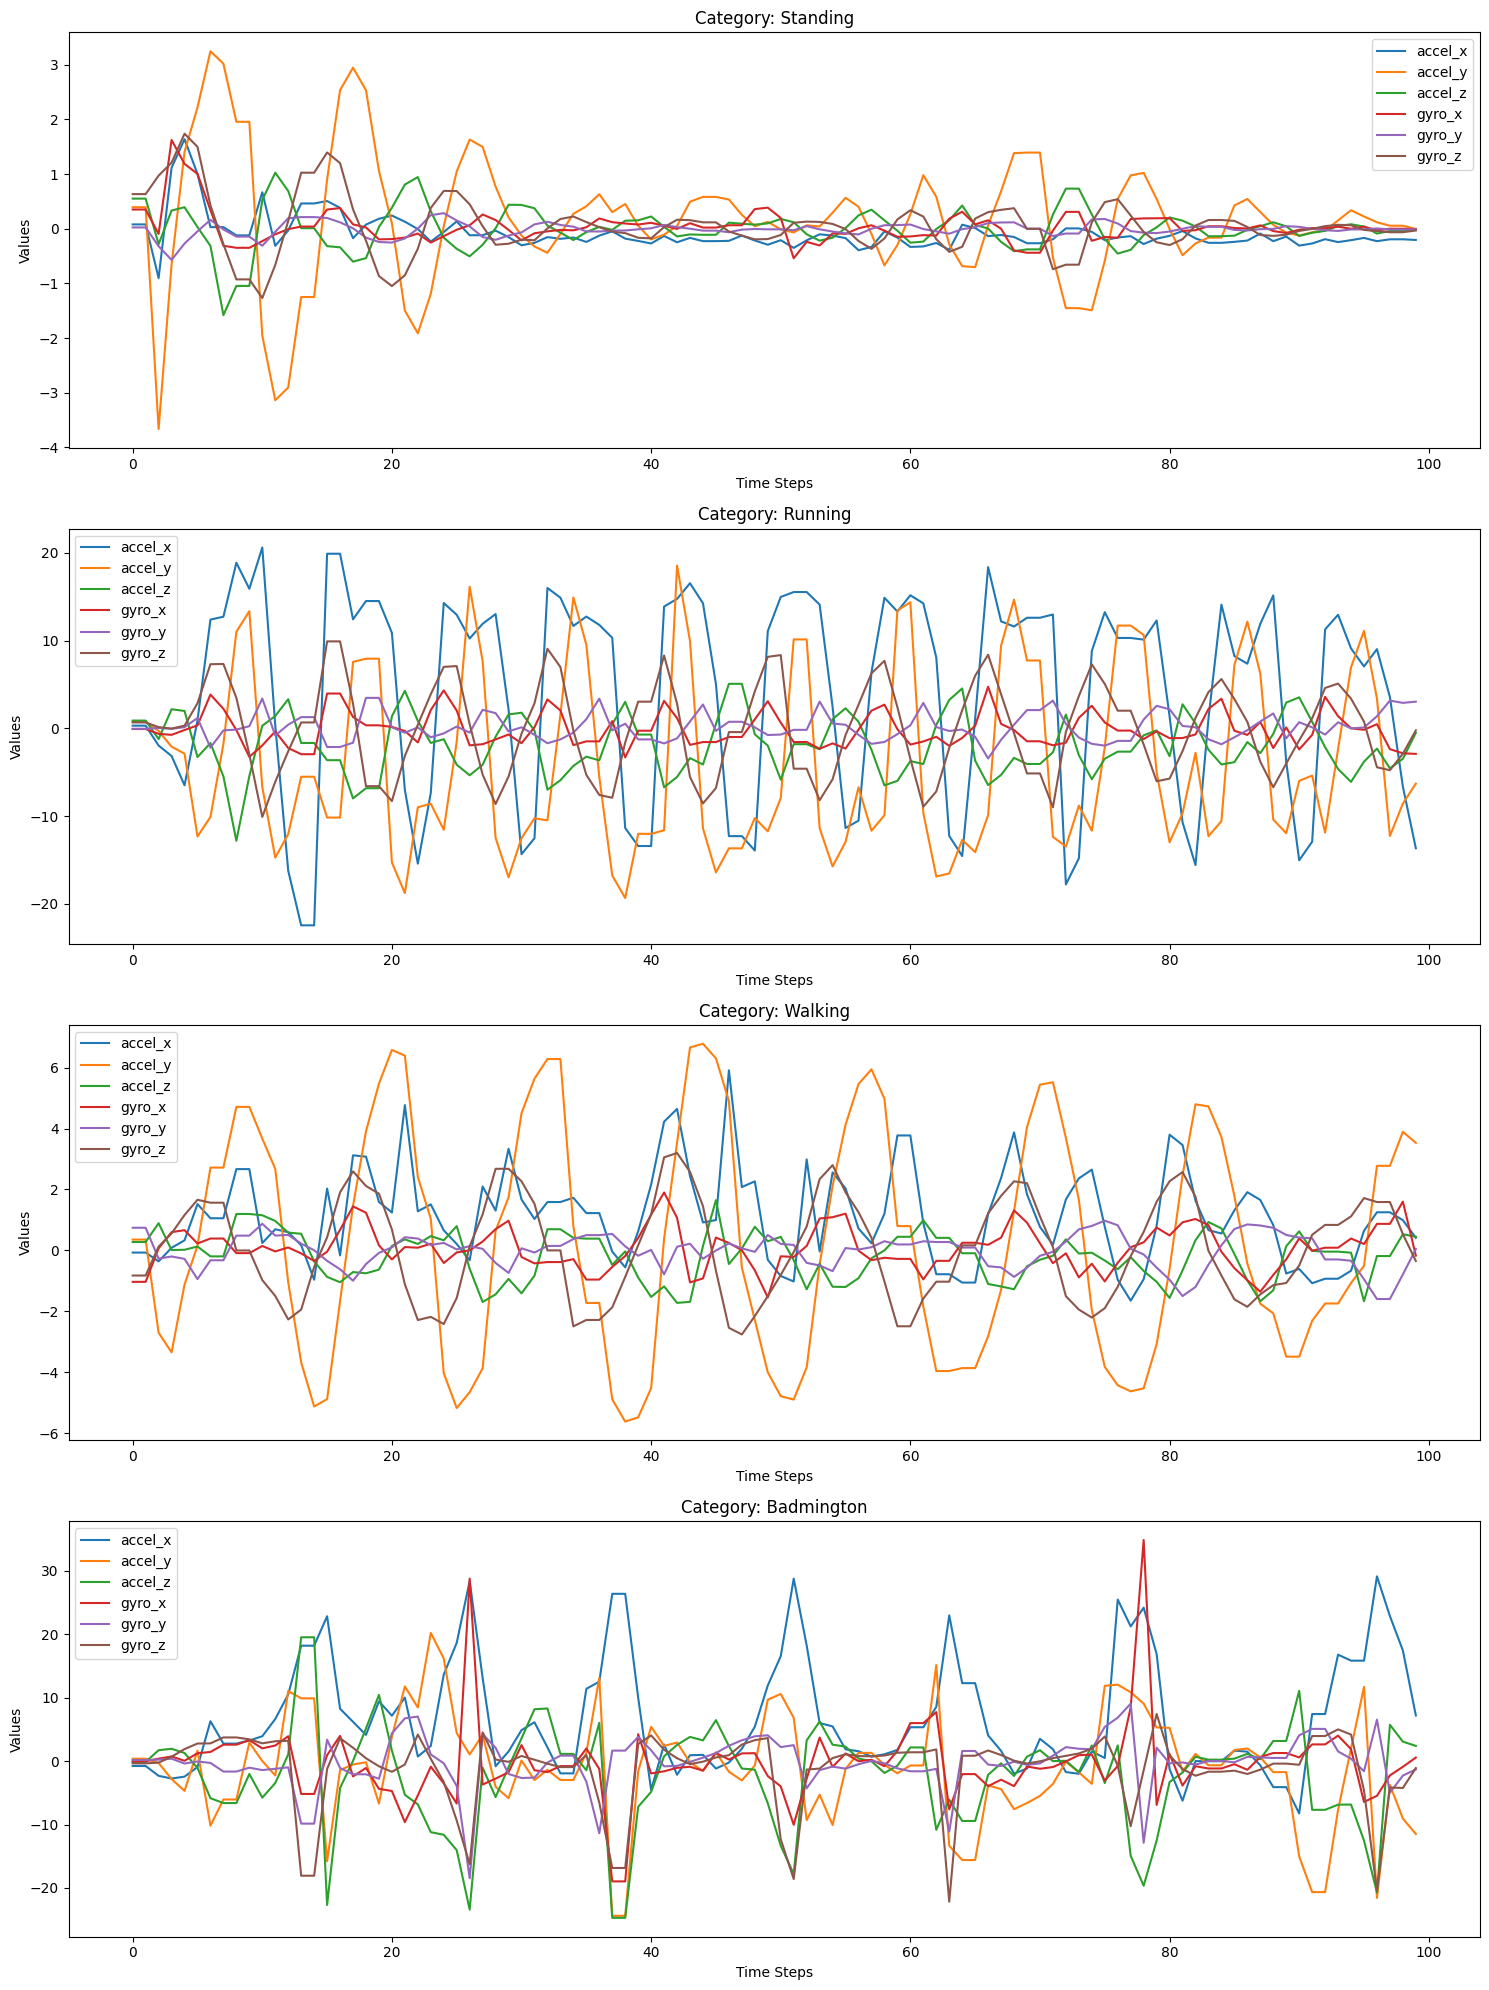

In [ ]:
# Plot the features for 4 samples
series_indices = [0, 10, 20, 30]
categories = ['Standing', 'Running', 'Walking', 'Badmington']
features = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z' ]

# Get the data from the indices
selected_series = X_train[series_indices]

# Plot the series
fig, axes = plt.subplots(len(series_indices), 1, figsize=(15, 20))

# Build the loop to plot
for i in range(len(series_indices)):
    for j in range(len(features)):
        axes[i].plot(selected_series[i, j], label=features[j])

    # Customizing the plot
    axes[i].set_title(f"Category: {categories[i]}")
    axes[i].set_xlabel("Time Steps")
    axes[i].set_ylabel("Values")
    axes[i].legend()

plt.tight_layout()
plt.show()

# Model with InceptionTime

In [ ]:
from sktime.classification.deep_learning import InceptionTimeClassifier

In [ ]:
# Build the model
model = InceptionTimeClassifier(n_epochs=1500, verbose=True)
model.fit(X_train, y_train)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 100, 6)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_32 (Conv1D)  │ (None, 100, 32)   │        192 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_6     │ (None, 100, 6)    │          0 │ input_layer_1[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_33 (Conv1D)  │ (None, 100, 32)   │     40,960 │ conv1d_32[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_34 (Conv1D)  │ (None, 100, 32)   │     20,480 │ conv1d_32[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_35 (Conv1D)  │ (None, 100, 32)   │     10,240 │ conv1d_32[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_36 (Conv1D)  │ (None, 100, 32)   │        192 │ max_pooling1d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 100, 128)  │          0 │ conv1d_33[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_34[0][0],  │
│                     │                   │            │ conv1d_35[0][0],  │
│                     │                   │            │ conv1d_36[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 128)  │        512 │ concatenate_6[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 100, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_37 (Conv1D)  │ (None, 100, 32)   │      4,096 │ activation_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_7     │ (None, 100, 128)  │          0 │ activation_8[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_38 (Conv1D)  │ (None, 100, 32)   │     40,960 │ conv1d_37[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_39 (Conv1D)  │ (None, 100, 32)   │     20,480 │ conv1d_37[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_40 (Conv1D)  │ (None, 100, 32)   │     10,240 │ conv1d_37[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_41 (Conv1D)  │ (None, 100, 32)   │      4,096 │ max_pooling1d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 100, 128)  │          0 │ conv1d_38[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_39[0][0],  │
│                     │                   │            │ conv1d_40[0][0],  │
│                     │                   │            │ conv1d_41[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 128)  │        512 │ concatenate_7[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 100, 128)  │          0 │ batch_normalizat

 Total params: 493,188 (1.88 MB)

 Trainable params: 491,140 (1.87 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.2500 - loss: 1.6932 - learning_rate: 0.0010
Epoch 2/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9250 - loss: 0.4171 - learning_rate: 0.0010
Epoch 3/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.1399 - learning_rate: 0.0010
Epoch 4/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0519 - learning_rate: 0.0010
Epoch 5/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0246 - learning_rate: 0.0010
Epoch 6/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0146 - learning_rate: 0.0010
Epoch 7/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0099 - learning_rate: 0.0010
Epoch 8/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0071 - learning_rate: 0.0010
Epoch 9/1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0051 - learning_rate: 0.0010
Epoch 10/1500
1/1 ━

InceptionTimeClassifier(verbose=True)

In [ ]:
# Make the predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array(['standing', 'standing', 'standing', 'standing', 'standing',
       'standing', 'standing', 'standing', 'standing', 'standing',
       'running', 'running', 'running', 'running', 'running', 'running',
       'running', 'running', 'running', 'running', 'walking', 'walking',
       'walking', 'walking', 'walking', 'walking', 'walking', 'walking',
       'walking', 'walking', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton'], dtype='<U9')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Compute the accurary
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

   badminton       1.00      1.00      1.00        10
     running       1.00      1.00      1.00        10
    standing       1.00      1.00      1.00        10
     walking       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



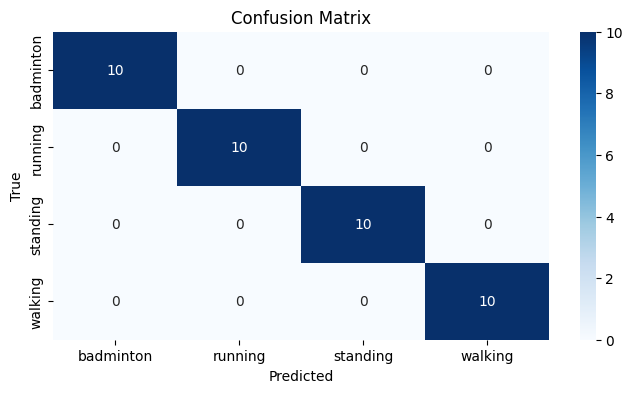

In [ ]:
# Visualize the confusion Matrix with a Heatmap
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 4))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

* Try with other datasets
* Perform Cross-Validation with large enough datasets
* Perform Parameter Tuning
